# Analysis of Hallprobe data for TB Dipoles

## Nominal Energy: 0.15058 GeV (Current: 253.622 A)

In [1]:
import hallprobe
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
energy = 0.15058
x0 = 4.6467
s_step = 0.1
currlabel = '253p62A'

spec_dip = 15.0    # [Deg]
spec_dip_error = 0.15  # [%]
# spec_quad = 0.1  # [T]
spec_quad_error = 2.4  # [%]
# spec_sext = 0.0  # [T/m]
spec_sext_error = 9.0  # [%]

data = {
    'DLT-001': '2018-08-01_DTL-001_Model03_Hall_Imc=253.622A',
    'DLT-002': '2018-07-31_DTL-002_Model03_Hall_Imc=253.622A',
    'DLT-003': '2018-08-01_DTL-003_Model03_Hall_Imc=253.622A',
}

danalysis = [hallprobe.FMapAnalysisProduction(k, currlabel, v, energy, x0, s_step) for k,v in data.items()]
for d in danalysis:
    d.files_read_results()

# Deflection Angle

<IPython.core.display.Javascript object>


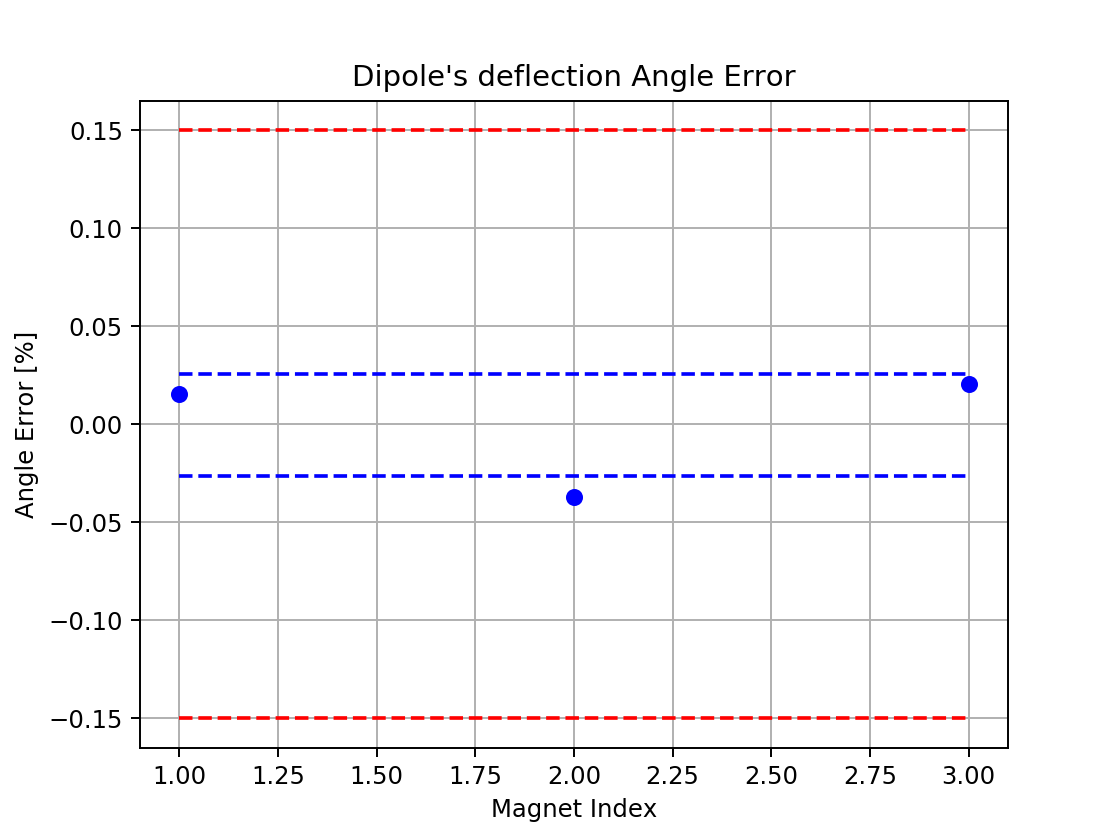

In [3]:
spec_d, spec_d_error = spec_dip, spec_dip_error
d = np.array([-d.results_angle for d in danalysis])
d_avg = np.mean(d)
d_avg_error = 100*(d_avg - spec_d)/spec_d
d_error = 100*(d - spec_d)/spec_d
d_error_avg = np.mean(d_error)
d_error_std = np.std(d_error)
n = len(d_error)

plt.figure()
plt.plot([1,2,3], d_error, 'ob')
# Data RMS
plt.plot([1, n], [d_error_avg + d_error_std, ]*2, '--b')
plt.plot([1, n], [d_error_avg - d_error_std, ]*2, '--b')
# Spec RMS
plt.plot([1, n], [-spec_d_error, ]*2, '--r')
plt.plot([1, n], [+spec_d_error, ]*2, '--r')

plt.grid()
plt.xlabel('Magnet Index')
plt.ylabel('Angle Error [%]')
plt.title("Dipole's deflection Angle Error")
plt.legend()
plt.show()

# Integrated Quadrupole

quadrupole of magnet DLT-001: +0.0693 T
quadrupole of magnet DLT-002: +0.0704 T
quadrupole of magnet DLT-003: +0.0701 T


<IPython.core.display.Javascript object>


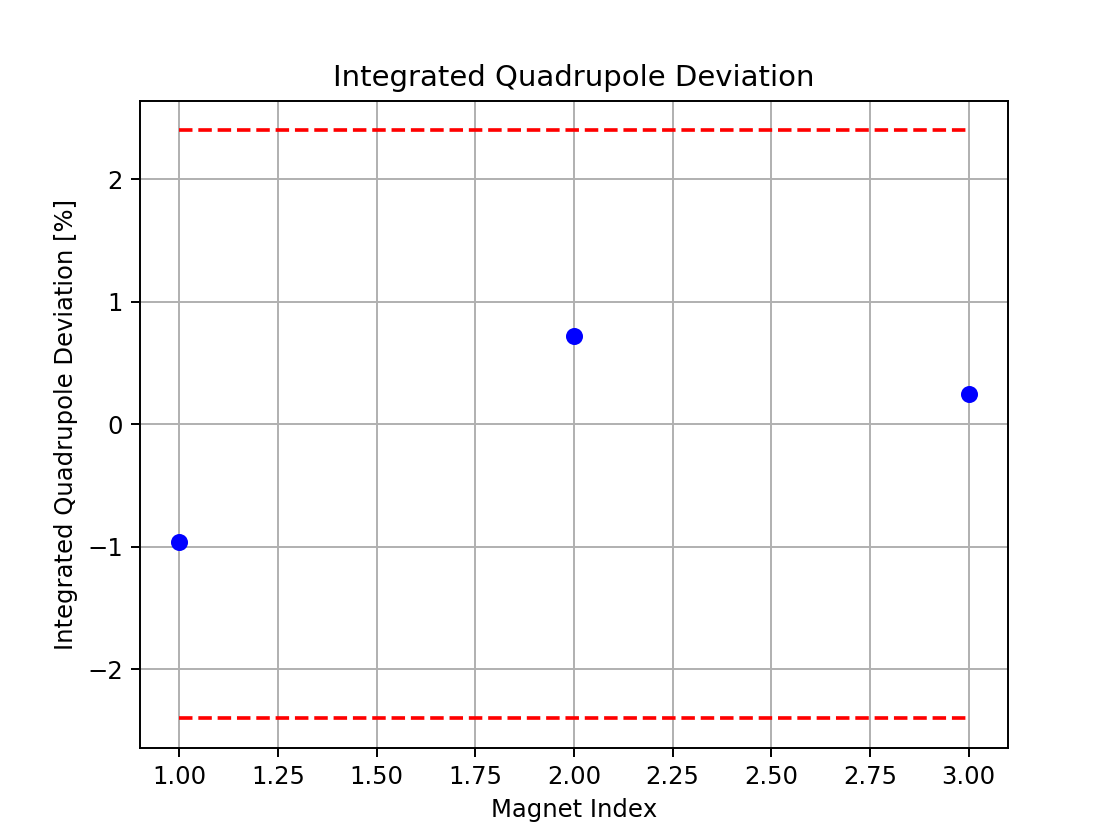

In [5]:
spec_d_error = spec_quad_error
d = np.array([d.multipoles_normal[1] for d in danalysis])
d_avg = np.mean(d)
d_avg_error = 100*(d - d_avg)/d_avg
n = len(d_error)

for i in range(len(d)):
    print('quadrupole of magnet {}: {:+.4f} T'.format(danalysis[i].magnet, d[i]))
    
plt.figure()
plt.plot([1,2,3], d_avg_error, 'ob')
# Spec RMS
plt.plot([1, n], [-spec_d_error, ]*2, '--r')
plt.plot([1, n], [+spec_d_error, ]*2, '--r')

plt.grid()
plt.xlabel('Magnet Index')
plt.ylabel('Integrated Quadrupole Deviation [%]')
plt.title("Integrated Quadrupole Deviation")
plt.legend()
plt.show()

# Integrated Sextupole

sextupole of magnet DLT-001: +1.7726 T/m
sextupole of magnet DLT-002: +1.7869 T/m
sextupole of magnet DLT-003: +1.8074 T/m


<IPython.core.display.Javascript object>


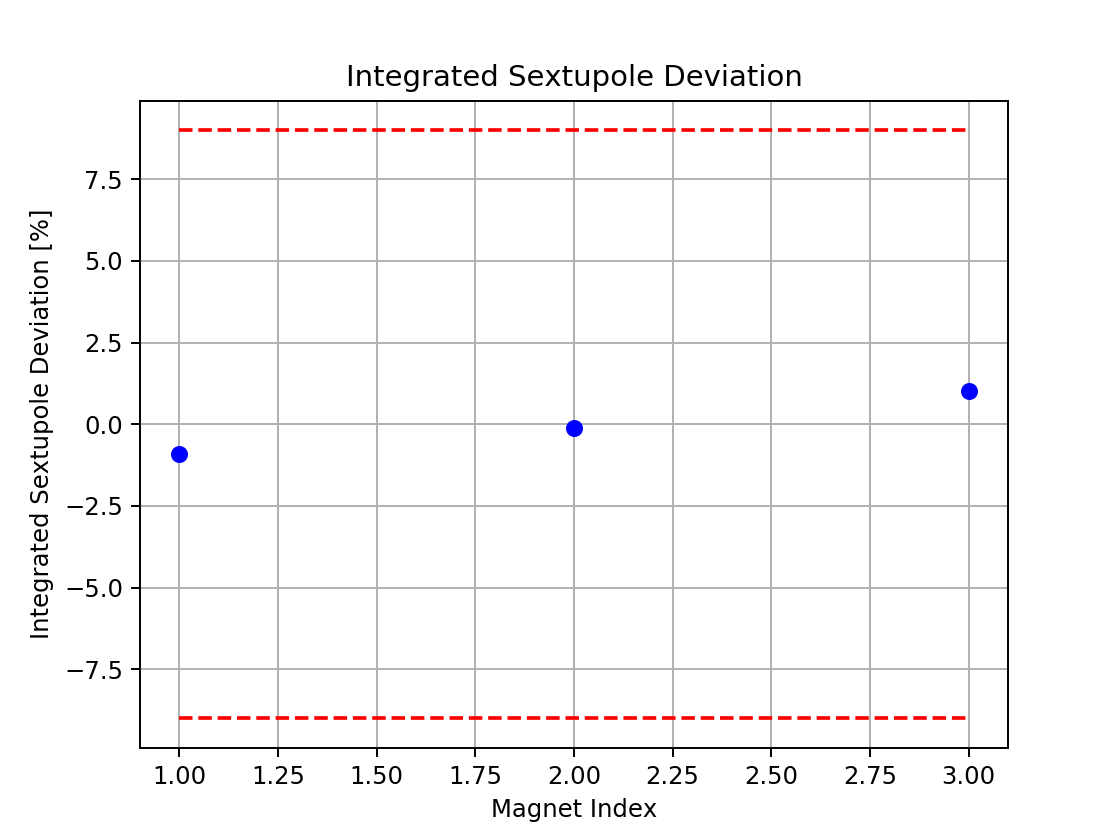

In [7]:
spec_d_error = spec_sext_error
d = np.array([d.multipoles_normal[2] for d in danalysis])
d_avg = np.mean(d)
d_avg_error = 100*(d - d_avg)/d_avg
n = len(d_error)

for i in range(len(d)):
    print('sextupole of magnet {}: {:+.4f} T/m'.format(danalysis[i].magnet, d[i]))

plt.figure()
plt.plot([1,2,3], d_avg_error, 'ob')
# Spec RMS
plt.plot([1, n], [-spec_d_error, ]*2, '--r')
plt.plot([1, n], [+spec_d_error, ]*2, '--r')

plt.grid()
plt.xlabel('Magnet Index')
plt.ylabel('Integrated Sextupole Deviation [%]')
plt.title("Integrated Sextupole Deviation")
plt.legend()
plt.show()

# Multipoles

<IPython.core.display.Javascript object>


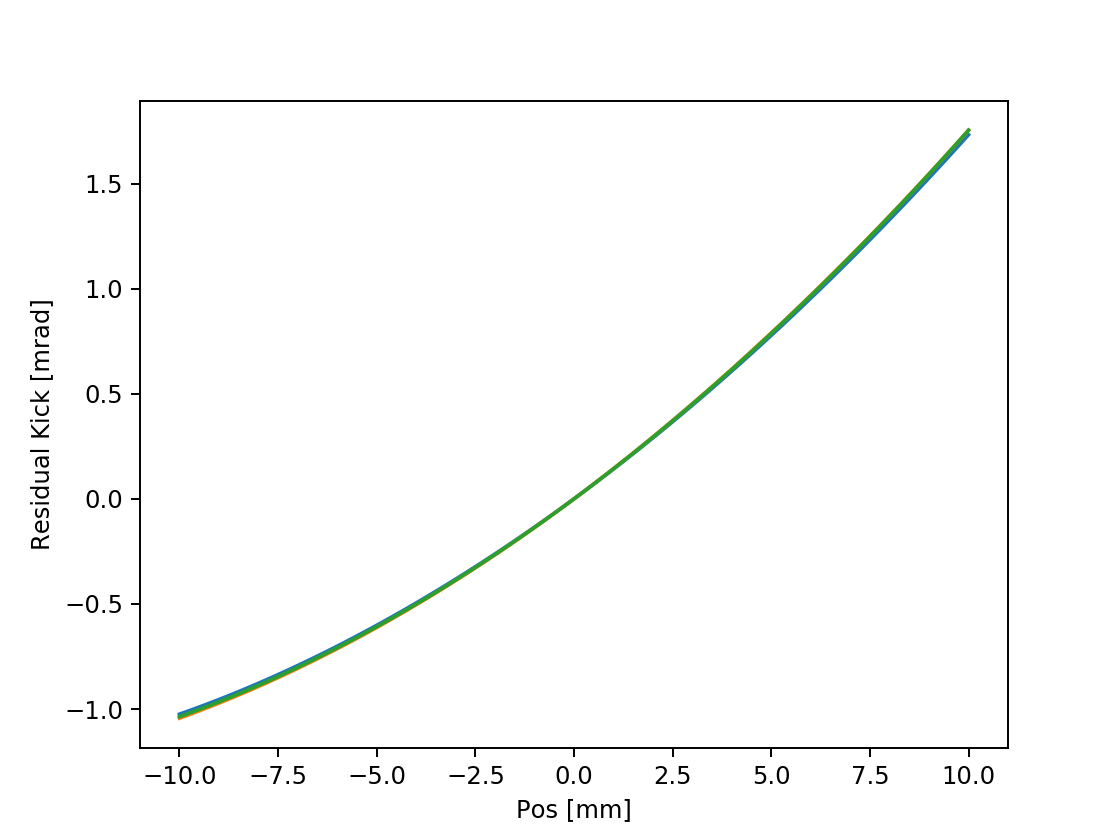

Harm    DLT-001     DLT-002     DLT-003   
n=00  +1.0000e+00 +1.0000e+00 +1.0000e+00 
n=01  -9.2157e-03 -9.3773e-03 -9.3275e-03 
n=02  -4.1278e-03 -4.1631e-03 -4.2086e-03 
n=03  -3.1263e-05 +8.8846e-05 +7.5059e-06 
n=04  +9.6660e-05 +1.3094e-04 +3.2005e-04 
n=05  +1.4010e-04 -2.9544e-05 +1.6629e-05 
n=06  -4.1745e-04 -3.1836e-04 -8.4880e-04 


In [8]:
# plot
plt.figure()
for d in danalysis:
    y, x = d.calc_multipoles_kick(10/1000)
    plt.plot(x*1000, y*1e3)
plt.xlabel('Pos [mm]')
plt.ylabel('Residual Kick [mrad]')   
plt.show()

# print
k = tuple(danalysis[0].multipoles_normal_relative.keys())
print('{:5s} '.format('Harm'), end='')
for d in danalysis:
    print('{:^11s} '.format(d.magnet), end='')
print()
for i in range(len(k)):
    print('n={:02d}  '.format(k[i]), end='')
    for d in danalysis:
        print('{:+11.4e} '.format(d.multipoles_normal_relative[k[i]]), end='')
    print()